In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import os
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import seaborn as sns
import timeit

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
test=pd.read_csv("../input/ece-657a-w20-asg3-part-1/testX.csv")
train=pd.read_csv("../input/ece-657a-w20-asg3-part-1/train.csv")
sample=pd.read_csv("../input/ece-657a-w20-asg3-part-1/samplesubmission.csv")

/kaggle/input/ece-657a-w20-asg3-part-1/samplesubmission.csv
/kaggle/input/ece-657a-w20-asg3-part-1/train.csv
/kaggle/input/ece-657a-w20-asg3-part-1/testX.csv


In [43]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [44]:
train

,Id,Label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,10000,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10002,0,0,0,0,0,0,0,0,0,...,31,9,0,0,0,0,0,0,0,0
3,10003,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,69995,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,69996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,69997,4,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,69998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
X=train.iloc[:,2:786]
y=train.iloc[:,1]

In [46]:
sample.head()

,Id,Label
0,0,3
1,1,3
2,2,3
3,3,3
4,4,3


In [47]:
train['Label'].unique()

array([4, 0, 1, 2, 3])

In [48]:
y

0        4
1        0
2        0
3        4
4        1
        ..
59995    3
59996    0
59997    4
59998    0
59999    2
Name: Label, Length: 60000, dtype: int64

> # NORMALIZING



X

In [49]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,31,9,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,31,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,27,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# scaler=StandardScaler() #can also be done by dividing by 255.
# scaler=scaler.fit(X_train)
# X_train_normalized=scaler.transform(X_train)
# X_test_normalized=scaler.transform(X_test)
X_normalized=X/255;

In [51]:
X_normalized

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,...,0.121569,0.035294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying LDA 

In [92]:
start = timeit.default_timer()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
iso = LDA(solver='svd') # svd for large no. of features.
iso_transfer=iso.fit_transform(X_normalized, y) #feature extraction

iso_transfer=pd.DataFrame(iso_transfer)
stop = timeit.default_timer()
print('Time LLE: ', stop - start)

Time LLE:  13.631105124000896


# SPLIT

In [53]:
iso_transfer

,0,1,2,3
0,1.416507,0.845682,2.448755,-2.689683
1,-2.240411,-0.384557,0.978988,-0.111109
2,-1.977967,-0.408524,0.553582,0.603046
3,2.764417,2.519599,1.726740,0.873993
4,-1.520178,-0.887940,0.494293,-0.767861
...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396
59996,-3.476857,0.747639,-0.223132,0.657417
59997,0.959477,-0.093987,1.400663,-0.045810
59998,-3.827951,1.961441,-0.701571,-0.294758


In [54]:
X_train,X_test,y_train,y_test=train_test_split(iso_transfer,y,test_size=0.2,random_state=42)

In [55]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

In [56]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [57]:
X_train

,0,1,2,3
0,2.520161,-0.424294,-1.002926,-1.084380
1,-3.449979,1.475794,-0.468051,0.313932
2,-0.477221,-1.199991,0.652165,1.211384
3,0.209747,0.146796,-0.162632,-1.531428
4,2.479756,-1.366987,-2.890585,-0.494287
...,...,...,...,...
47995,-1.886443,-0.115742,1.004563,-1.185894
47996,-3.720084,1.537369,-1.223331,0.520949
47997,4.383159,1.512936,0.214804,-0.731075
47998,-1.342628,0.215580,-0.187232,-1.473407


In [58]:
X_test

,0,1,2,3
0,-2.514814,0.221940,1.002029,-2.261858
1,-2.420194,-0.148569,1.068081,0.109968
2,0.773414,-1.774762,-1.134994,0.465105
3,-1.882726,-0.799473,0.720746,0.375739
4,2.776925,1.125199,1.258826,1.253992
...,...,...,...,...
11995,-3.114822,1.253189,-0.616586,0.758789
11996,2.282211,-0.565783,-0.380338,0.121807
11997,3.081293,1.925249,0.858497,-1.625365
11998,-0.878742,0.163767,1.437274,-2.481978


In [59]:
y_train

,Label
0,3
1,0
2,2
3,2
4,3
...,...
47995,0
47996,0
47997,4
47998,2


In [60]:
y_test

,Label
0,1
1,0
2,2
3,1
4,4
...,...
11995,0
11996,3
11997,4
11998,1


# PREPARING THE FINAL TEST DATA 

In [61]:
test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [62]:
unlabelled_test=test.iloc[:,1:]

In [63]:
unlabelled_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,169,131,0,0,0,0,0,0,0,0
9998,0,0,0,1,0,0,0,0,24,116,...,85,104,138,51,0,3,0,0,0,0


# Normalizing Test data 

In [64]:
unlabelled_test_normalized=unlabelled_test/255

In [65]:
unlabelled_test_normalized=pd.DataFrame(unlabelled_test_normalized)

In [66]:
unlabelled_test_normalized

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.000000,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,...,0.662745,0.513725,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.0,0.000000,0.094118,0.454902,...,0.333333,0.407843,0.541176,0.200000,0.000000,0.011765,0.0,0.0,0.0,0.0


# FEATURE EXTRACTION LDA

In [67]:
unlabelled_test_components=iso.transform(unlabelled_test_normalized)
unlabelled_test_components=pd.DataFrame(unlabelled_test_components)
unlabelled_test_components

,0,1,2,3
0,1.857980,-1.594689,-1.334924,-0.313799
1,3.718277,1.030956,0.488152,0.649718
2,-2.580736,-0.672197,0.759247,-0.245104
3,-1.919221,-0.657884,1.505043,-0.278611
4,-0.734572,-0.295098,-0.467375,-0.161176
...,...,...,...,...
9995,0.250765,-1.251581,1.129069,-2.830013
9996,-2.111902,-1.014069,1.785855,-0.176525
9997,0.874649,0.521246,0.592403,0.625898
9998,-0.816669,-1.022837,0.358891,0.911543


# SCATTER PLOT BETWEEN THE COMPONENTS 

In [93]:
iso_transfer_for_scatter_with_label=iso_transfer
iso_transfer_for_scatter_with_label['Label']=y

In [94]:
iso_transfer_for_scatter_with_label

,0,1,2,3,Label
0,1.416507,0.845682,2.448755,-2.689683,4
1,-2.240411,-0.384557,0.978988,-0.111109,0
2,-1.977967,-0.408524,0.553582,0.603046,0
3,2.764417,2.519599,1.726740,0.873993,4
4,-1.520178,-0.887940,0.494293,-0.767861,1
...,...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396,3
59996,-3.476857,0.747639,-0.223132,0.657417,0
59997,0.959477,-0.093987,1.400663,-0.045810,4
59998,-3.827951,1.961441,-0.701571,-0.294758,0


In [95]:
iso_transfer

,0,1,2,3,Label
0,1.416507,0.845682,2.448755,-2.689683,4
1,-2.240411,-0.384557,0.978988,-0.111109,0
2,-1.977967,-0.408524,0.553582,0.603046,0
3,2.764417,2.519599,1.726740,0.873993,4
4,-1.520178,-0.887940,0.494293,-0.767861,1
...,...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396,3
59996,-3.476857,0.747639,-0.223132,0.657417,0
59997,0.959477,-0.093987,1.400663,-0.045810,4
59998,-3.827951,1.961441,-0.701571,-0.294758,0


In [96]:
iso_transfer=iso_transfer.iloc[:,0:4]

In [97]:
iso_transfer

,0,1,2,3
0,1.416507,0.845682,2.448755,-2.689683
1,-2.240411,-0.384557,0.978988,-0.111109
2,-1.977967,-0.408524,0.553582,0.603046
3,2.764417,2.519599,1.726740,0.873993
4,-1.520178,-0.887940,0.494293,-0.767861
...,...,...,...,...
59995,1.588443,-1.775923,-2.286764,-0.479396
59996,-3.476857,0.747639,-0.223132,0.657417
59997,0.959477,-0.093987,1.400663,-0.045810
59998,-3.827951,1.961441,-0.701571,-0.294758


Text(0.5, 1.0, 'ISOMAP')

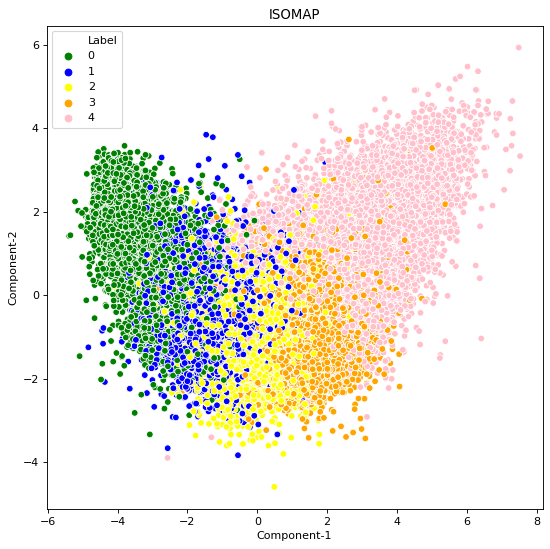

In [70]:
fig=plt.figure(figsize=(8, 8), dpi= 80)
sns.scatterplot(x=iso_transfer_for_scatter_with_label[0],y=iso_transfer_for_scatter_with_label[1],hue=iso_transfer_for_scatter_with_label.Label,legend='full',palette=['green','blue','yellow','orange','pink'])
plt.xlabel('Component-1')
plt.ylabel('Component-2')
plt.title('ISOMAP')

# GRADIENT BOOSTING

## Directly appling the default parameters with depth=10, lr=[0.1,1] {result obtained from PCA}

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
lr = [0.1,1]
n_estimators = [100]
max_depth = [10]

for l in lr:
    for e in n_estimators:
        for d in max_depth:
           
            start=timeit.default_timer()

            gb2 = GradientBoostingClassifier(loss='deviance',  n_estimators= e,learning_rate= l, max_depth = d, random_state=42 )
            gb2.fit(X_train,np.ravel(y_train))
            y_pred=gb2.predict(X_test)
            accscore=accuracy_score(y_pred,y_test)
            stop=timeit.default_timer()

            print('Mean Accuracy at ','learning rate=',l,' , n_estimators=',e,' and at max_depth=',d,'is',accscore, ' where Timetaken is ',stop-start)

## RESULT---
### 1. Mean Accuracy at  learning rate= 0.1  , n_estimators= 100  and at max_depth= 10 is 0.7140833333333333  where Timetaken is  156.34929820499383
### 2. Mean Accuracy at  learning rate= 1  , n_estimators= 100  and at max_depth= 10 is 0.6739166666666667  where Timetaken is  156.98065359700558

## BEST PARAMETERS::

### 1.DEPTH=10, LEARNING RATE =0.1 , N_ESTIMATORS=100


# CONFUSION MATRIX

In [71]:

from sklearn.ensemble import GradientBoostingClassifier

start=timeit.default_timer()

gb2 = GradientBoostingClassifier(loss='deviance',n_estimators= 100,learning_rate= 0.1, max_depth = 10, random_state=42 )
gb2.fit(X_train,np.ravel(y_train))
y_pred=gb2.predict(X_test)
accscore=accuracy_score(y_pred,y_test)

stop=timeit.default_timer()


print('Mean Accuracy at ','learning rate=',l,' , n_estimators=',e,' and at max_depth=',d,'is',accscore, ' where Timetaken is ',stop-start)# Confusion Matrix


from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_pred, y_test)
print('Confusion Matrix:\n', con_mat)

Mean Accuracy at  learning rate= 0.1  , n_estimators= 100  and at max_depth= 10 is 0.7140833333333333  where Timetaken is  161.147237940997
Confusion Matrix:
 [[2008  319   41    0    4]
 [ 338 1616  549   40   39]
 [  27  419 1342  410   53]
 [   2   42  366 1576  343]
 [   4   28   66  341 2027]]


# Classification Report

In [72]:
from sklearn.metrics import classification_report
class_rep = classification_report(y_pred, y_test, target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3', 'Class-4'])
print('Classification Report:\n', class_rep)

Classification Report:
               precision    recall  f1-score   support

     Class-0       0.84      0.85      0.85      2372
     Class-1       0.67      0.63      0.65      2582
     Class-2       0.57      0.60      0.58      2251
     Class-3       0.67      0.68      0.67      2329
     Class-4       0.82      0.82      0.82      2466

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.71     12000
weighted avg       0.71      0.71      0.71     12000



# ROC Curve

In [73]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
y_labelized= label_binarize(y_test, classes=[0,1,2,3,4])

In [74]:
y_labelized

array([[0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [75]:
y_labelized.shape

(12000, 5)

In [76]:
n_classes = y_labelized.shape[1]

In [77]:
nb1= OneVsRestClassifier(GradientBoostingClassifier(loss='deviance',n_estimators= 100,learning_rate= 0.1, max_depth = 10, random_state=42 ))
nb1.fit(X_train, y_train)

OneVsRestClassifier(estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='deviance',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf

In [78]:
prob = nb1.predict_proba(X_test)

In [79]:
prob

array([[1.62587456e-01, 8.09222083e-01, 2.49842715e-02, 1.69514631e-03,
        1.51104309e-03],
       [5.62314404e-01, 4.03422270e-01, 2.81863941e-02, 3.23685923e-03,
        2.84007216e-03],
       [4.72797621e-04, 1.86475099e-02, 5.23310128e-01, 4.54483968e-01,
        3.08559591e-03],
       ...,
       [7.84471604e-04, 1.57337941e-03, 2.01382592e-03, 1.13101847e-02,
        9.84318138e-01],
       [1.10124925e-02, 8.69862919e-01, 1.01258570e-01, 4.65928799e-03,
        1.32067301e-02],
       [7.29786765e-01, 2.41968513e-01, 2.46724939e-02, 2.02492642e-03,
        1.54730169e-03]])

In [80]:
prob.shape

(12000, 5)

### y_labelized is labelized y_test i.e labelized val data

### "Distance of the samples X to the separating hyperplane."

In [81]:
f_p_r = dict()
t_p_r = dict()
roc_auc = dict()

for j in range(n_classes):
    f_p_r[j], t_p_r[j], _ = roc_curve(y_labelized[:, j], prob[:, j])
    roc_auc[j] = auc(f_p_r[j], t_p_r[j])

In [82]:
print('fpr 0',f_p_r[0].shape)
print('fpr 1',f_p_r[1].shape)
print('fpr 2',f_p_r[2].shape)
print('fpr 3',f_p_r[3].shape)
print('fpr 4',f_p_r[4].shape)
print("\n\n")
print('tpr 0',t_p_r[0].shape)
print('tpr 1',t_p_r[1].shape)
print('tpr 2',t_p_r[2].shape)
print('tpr 3',t_p_r[3].shape)
print('tpr 4',t_p_r[4].shape)

fpr 0 (1062,)
fpr 1 (2310,)
fpr 2 (2525,)
fpr 3 (2124,)
fpr 4 (1301,)



tpr 0 (1062,)
tpr 1 (2310,)
tpr 2 (2525,)
tpr 3 (2124,)
tpr 4 (1301,)


In [83]:
print('roc_auc[0]',roc_auc[0])
print('roc_auc[1]',roc_auc[1])
print('roc_auc[2]',roc_auc[2])
print('roc_auc[3]',roc_auc[3])
print('roc_auc[4]',roc_auc[4])

roc_auc[0] 0.9807090145693712
roc_auc[1] 0.9129778344375792
roc_auc[2] 0.8868717685863573
roc_auc[3] 0.9287297120766433
roc_auc[4] 0.9724488410539408


### https://stackoverflow.com/questions/20113206/scikit-learn-svc-decision-function-and-predict

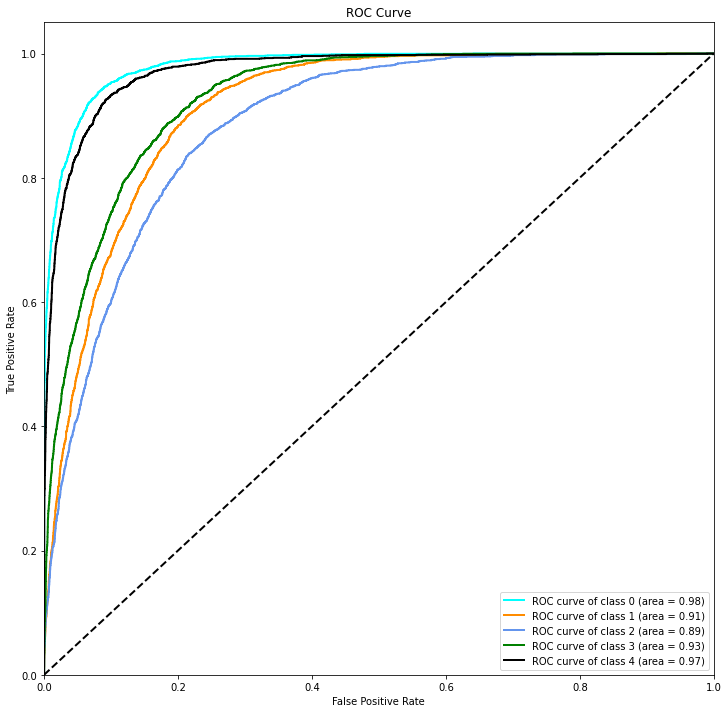

In [84]:
from itertools import cycle
p=2

plt.figure(figsize=(12,12))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'black'])
for i, color in zip(range(n_classes), colors):
    plt.plot(f_p_r[i], t_p_r[i], color=color, lw=p,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=p)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# TRAINING ON WHOLE DATASET AND TESTING THE UNLABELLED DATA----

In [98]:
from sklearn.ensemble import GradientBoostingClassifier
        
start=timeit.default_timer()

gb2 = GradientBoostingClassifier(loss='deviance',  n_estimators= 100,learning_rate= 0.1, max_depth = 10, random_state=42 )
gb2.fit(iso_transfer,np.ravel(y))
y_pred=gb2.predict(unlabelled_test_components)
  
    
    
stop=timeit.default_timer()
print("time taken",stop-start)

time taken 207.41810359100054


In [99]:
submission=y_pred

In [100]:
submission=pd.DataFrame(submission)
submission=pd.DataFrame.reset_index(submission)
submission.columns=['Id','Label']

In [101]:
submission

,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,3
9996,9996,1
9997,9997,3
9998,9998,2


In [102]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'
submission.to_csv(filename,index=False)
print('Saved file:' + filename)

Saved file:submission.csv
